# Titanic Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models


%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
data = pd.read_csv('data/train.csv')

X_test = pd.read_csv('data/test.csv')
y_test = pd.read_csv('data/gender_submission.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Dataset analysis

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

There is a lot of missing values. This process will be fixed in next stages of project.

### Cabin

In [7]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
data['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F2             3
              ..
E63            1
A16            1
B3             1
B4             1
D21            1
Name: Cabin, Length: 147, dtype: int64

Cabin has 687 missing values. The rest of values is very random and should have no impact for prediction.

### Name 

Everyone has unique name. So that variable has no impact for prediction performance.

### Embarked

In [9]:
embarked_data = data[['Embarked', 'Survived']]

In [10]:
embarked_data.groupby(['Embarked']).count()

,Survived
Embarked,
C,168
Q,77
S,644


<AxesSubplot:xlabel='Survived', ylabel='count'>

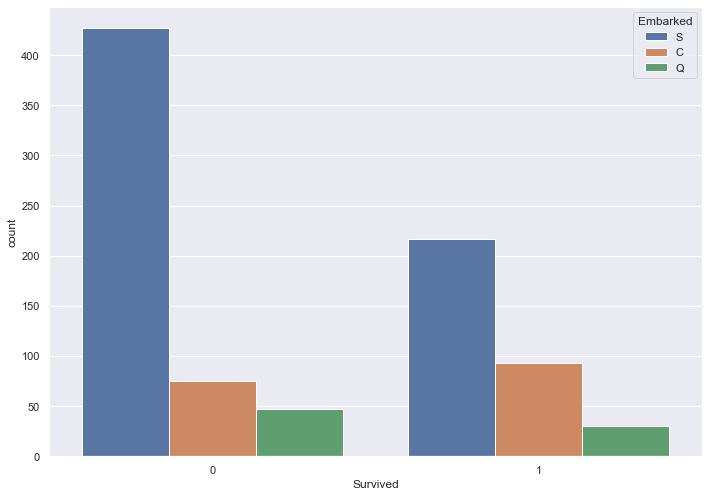

In [11]:
sns.countplot(data=embarked_data, x='Survived', hue='Embarked')

In [12]:
embarked_data.groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Because there is only 0 and 1 values. So the mean of this values is percent of people that survived.

Most of the casualites were embarked in Southampton(S), but most of surviviors were embarked in Southapmton(S) too.
The best percentage of surviviors were embarked in Cherbourg(C).

### Age

In [13]:
age_data = data[['Age', 'Survived']]

<ipython-input-14-7e41db6c8762>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['Age_Range'] = pd.cut(age_data['Age'], [0, 10, 20, 30, 40, 50, 60,70,80])


<AxesSubplot:xlabel='Age_Range', ylabel='count'>

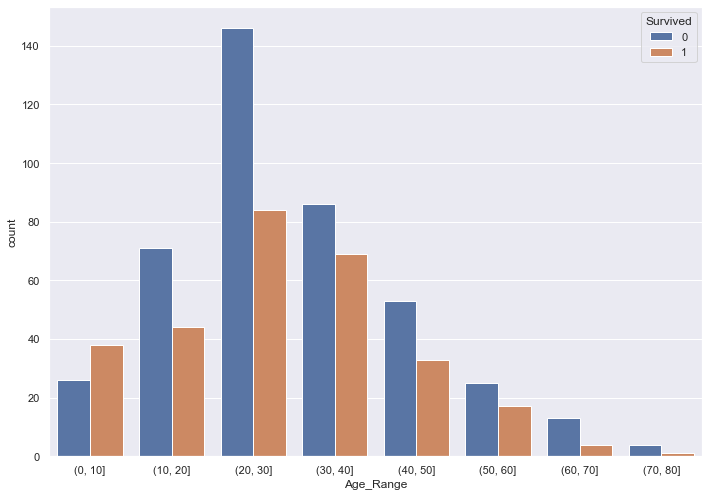

In [14]:
age_data['Age_Range'] = pd.cut(age_data['Age'], [0, 10, 20, 30, 40, 50, 60,70,80])

sns.countplot(data=age_data, hue='Survived', x='Age_Range')

In [15]:
age_data.groupby(['Age_Range']).count()

,Age,Survived
Age_Range,,
"(0, 10]",64,64
"(10, 20]",115,115
"(20, 30]",230,230
"(30, 40]",155,155
"(40, 50]",86,86
"(50, 60]",42,42
"(60, 70]",17,17
"(70, 80]",5,5


<AxesSubplot:xlabel='Age', ylabel='Density'>

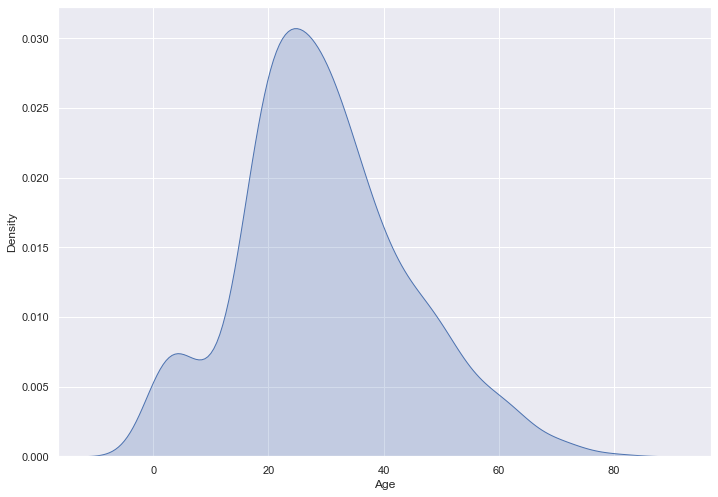

In [16]:
sns.kdeplot(data=age_data['Age'], shade=True)

In [17]:
age_data.groupby(['Age_Range']).mean()

,Age,Survived
Age_Range,,
"(0, 10]",4.268281,0.593750
"(10, 20]",17.317391,0.382609
"(20, 30]",25.423913,0.365217
"(30, 40]",35.051613,0.445161
"(40, 50]",45.372093,0.383721
"(50, 60]",54.892857,0.404762
"(60, 70]",63.882353,0.235294
"(70, 80]",73.300000,0.200000


The biggest number of surviviors were in (20,30] group. But, the biggest percentage of surviviors(not counting childrens, that were dependent on ther parents), were in (30,40] group.

### PClass

In [18]:
pclass_data = data[['Pclass', 'Survived']]

In [19]:
pclass_data.groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


Over 50% of people were in 3'rd class.

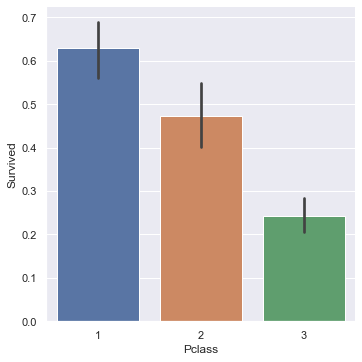

In [20]:
sns.catplot(data=pclass_data, x='Pclass', y='Survived', kind="bar")

In [21]:
pclass_data.groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Survived', ylabel='count'>

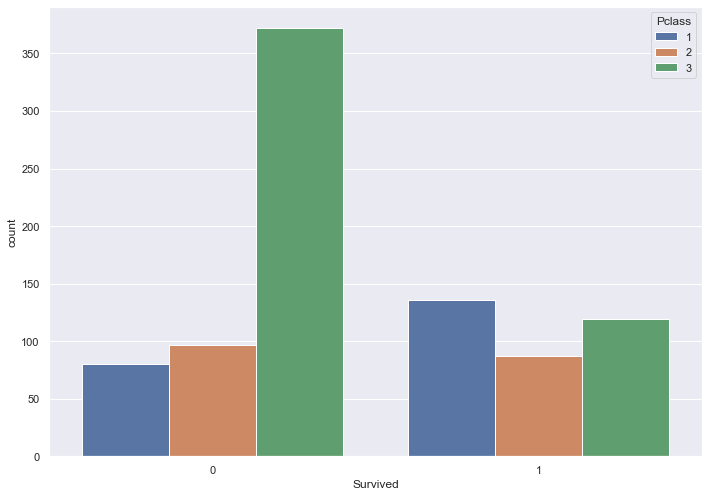

In [22]:
sns.countplot(data=pclass_data, x='Survived', hue='Pclass')

The most casuality rate was in 3'rd class, over 75%.
What gives more than 350 casualities in that group.

### Relatives
#### sibsp and parch

sibsp stands for number of siblings/spouses aboard

parch stands for number of parents/children aboard

In [23]:
rel_data = data[['Parch', 'Survived']]

In [24]:
rel_data.groupby('Parch').count()

,Survived
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


<AxesSubplot:xlabel='Survived', ylabel='count'>

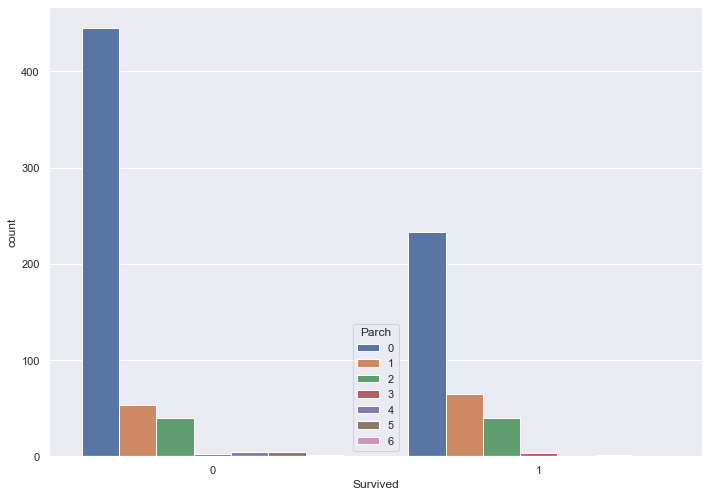

In [25]:
sns.countplot(data=rel_data, x='Survived', hue='Parch')

In [26]:
rel_data.groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


Most of people had no children and parents and they were the biggest group of surviviors.

The best percentage of suriviors were in group with three parents/childrens. But that gruop counts 5 people. 

In [27]:
rel_data = data[['SibSp', 'Survived']]

In [28]:
rel_data.groupby('SibSp').count()

,Survived
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


<AxesSubplot:xlabel='Survived', ylabel='count'>

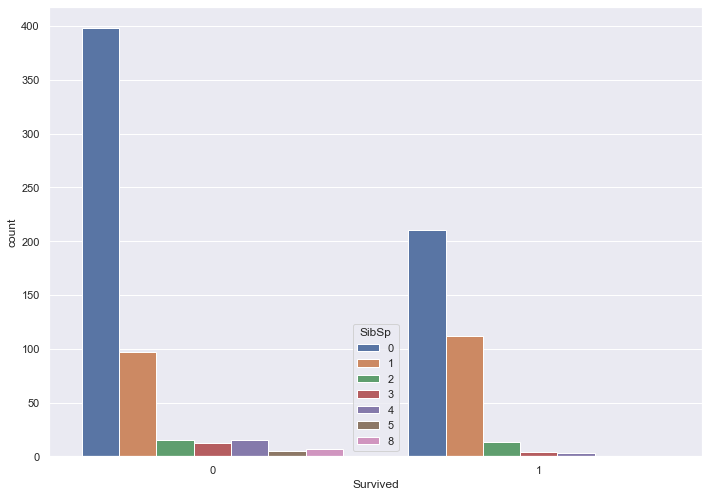

In [29]:
sns.countplot(data=rel_data, x='Survived', hue='SibSp')

In [30]:
rel_data.groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


If we combine people with more than  2 siblings/spouses less than 10 survived. Most survived were in gruop without any sibsp, but the biggest percentage was in group with 1.

In [31]:
rel_data = data[['SibSp', 'Parch', 'Survived']]

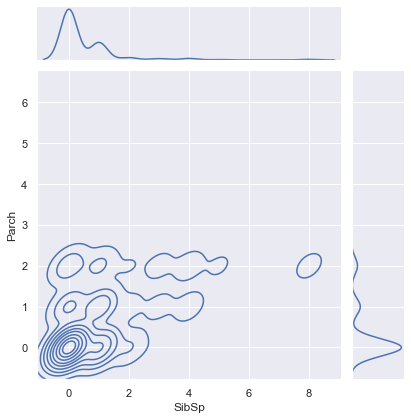

In [32]:
sns.jointplot(x=data['SibSp'], y=data['Parch'], kind="kde")

Both variables have similiar distribution, so in further steps it might be reasonable to combine it into one variable "relatives".

### Fare

In [33]:
fare_data = data[['Fare', 'Survived', 'Pclass']]
fare_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [34]:
fare_data['Fare_Range'] = pd.cut(fare_data['Fare'], [0, 8, 14, 31, 513])

<ipython-input-34-e3d0bd172019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare_data['Fare_Range'] = pd.cut(fare_data['Fare'], [0, 8, 14, 31, 513])


<AxesSubplot:xlabel='Fare_Range', ylabel='count'>

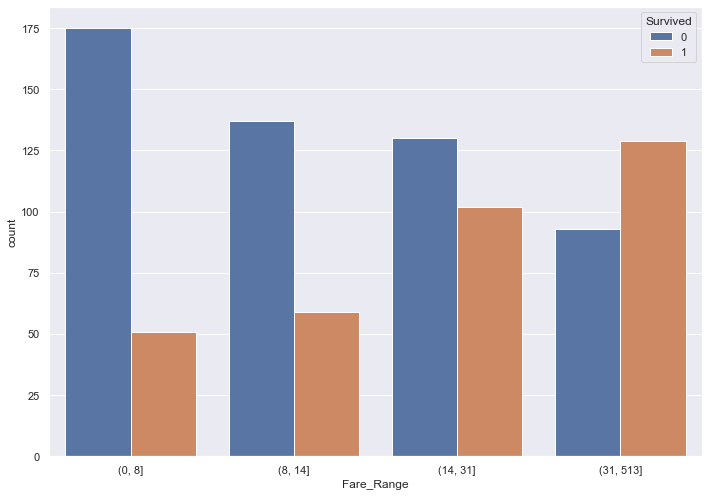

In [35]:
sns.countplot(data=fare_data, hue='Survived', x='Fare_Range')

Most people that survived, was in the highest quarter of fare prices.

<AxesSubplot:xlabel='Fare_Range', ylabel='count'>

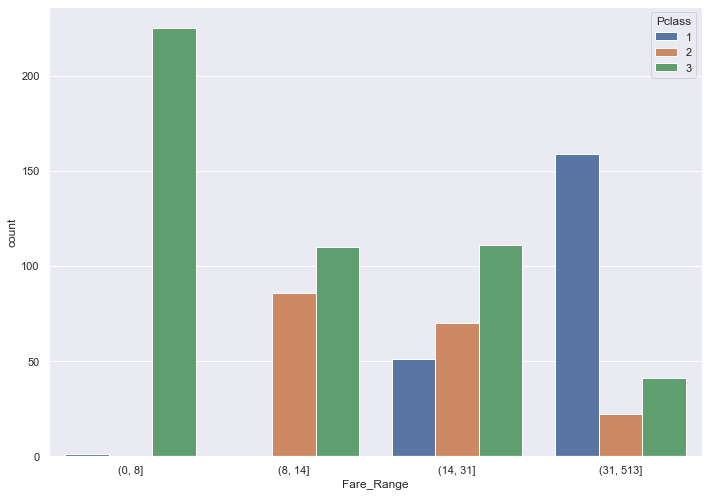

In [36]:
sns.countplot(data=fare_data, hue='Pclass', x='Fare_Range')

What we can see, even third class has very expensive fares. So we cannot get rid of that variable due to its distribution related to Pclass.

### Ticket

In [37]:
data['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
CA 2144     6
3101295     6
           ..
343275      1
13213       1
34218       1
111320      1
233866      1
Name: Ticket, Length: 681, dtype: int64

In [38]:
data['Ticket'].nunique()

681

Ticket conisit of 681 unique values, this catheoragical variables are probably used as "indexes". More over there is Fare variable. Ticket variable is useless.

### Sex 

<AxesSubplot:xlabel='Survived', ylabel='count'>

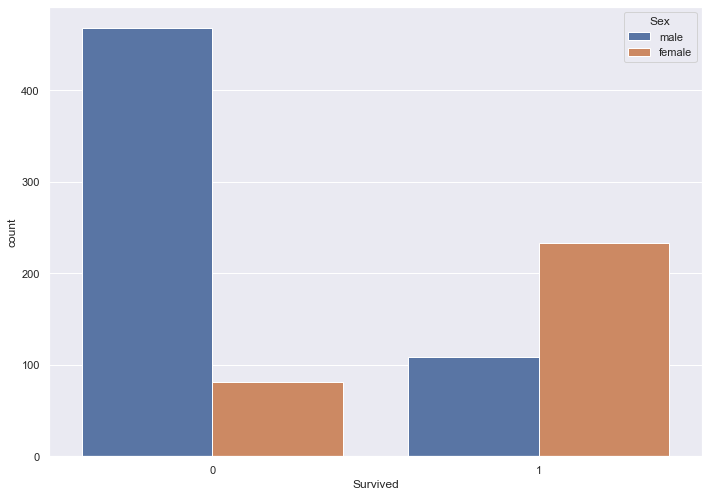

In [39]:
sns.countplot(data=data, x='Survived', hue='Sex')

Most of survived were women. Most of men died. Most of women survived. So conclusion is that sex is very important factor.

## Data processing

Analysis above shows which variables are useful and which may be removed.

In [40]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


 Varables that will be passed to model <br>
 1\. Pclass <br>
 2\. Sex<br>
 3\. Age converted into ranged value<br>
 4\. Relativies as SibSp and Parch combined<br>
 5\. Fare converted into ranged value <br>
 6\. Embarked

### Missing values

Missing values are in columns Embarked, Age, Cabin. Because we will remove Cabin, we can take care about Embarked add Age <br>
There are 2 missing values in Embarked, thefore column will be fitted with most common value that is S. <br>
In Age column there are 177 missing values. In this notebook we will replace this values with mean value of column.

In [41]:
def replace_missing_values(r_data):
    
    imputer = SimpleImputer(strategy='most_frequent')
    
    age_column = pd.DataFrame(r_data['Age'])
    
    imputed_age = pd.DataFrame(imputer.fit_transform(age_column))
    
    r_data['Age'] = imputed_age
    
    imputer = SimpleImputer(strategy='most_frequent')
    
    imputed_data = pd.DataFrame(imputer.fit_transform(r_data)) #It will also impute Cabin that will be removed
    imputed_data.columns = r_data.columns
    imputed_data.columns = r_data.columns
    
    return imputed_data

### Columns removing

In [42]:
def remove_columns(data):
    columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    return data.drop(columns_to_drop, axis=1)

### Categorical varibles

In [43]:
def change_categorical(data):
    label_encoder = LabelEncoder()
    
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    
    return data

### Ranged columns and relativies 

In [44]:
def transform_columns(data):
    def transorm_fare(fare):
        if fare < 8:
            return 0
        elif fare < 14:
            return 1
        elif fare < 31:
            return 2
        else:
            return 3
        
    def transform_age(x):
        if x < 10:
            return 0
        elif x < 20:
            return 1
        elif x < 30:
            return 2
        elif x < 40:
            return 3
        elif x < 50:
            return 4
        elif x < 60:
            return 5
        elif x < 70:
            return 6
        else:
            return 7
        
    data['Fare'] = data['Fare'].apply(lambda fare: transorm_fare(fare))
    data['Age'] = data['Age'].apply(lambda age: transform_age(age))
    
    relativies = data['SibSp'] + data['Parch']
    data = data.drop(['SibSp', 'Parch'], axis=1)
    data['Relativies'] = relativies
    
    return data

### Split X and Y dataset

In [45]:
def x_y_datasets(data):
    y = pd.DataFrame(data['Survived'])
    X = data.drop(['Survived'], axis=1)
    
    return X.astype(float), y.astype(float)

In [46]:
def clean_dataset(data):
    data = replace_missing_values(data)
    data = remove_columns(data)
    data = change_categorical(data)
    data = transform_columns(data)
    
    return data

In [47]:
data = clean_dataset(data)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relativies
0,0,3,1,2,0,2,1
1,1,1,0,3,3,0,1
2,1,3,0,2,0,2,0
3,1,1,0,3,3,2,1
4,0,3,1,3,1,2,0


In [48]:
X_train, y_train = x_y_datasets(data)

In [49]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Relativies
0,3.0,1.0,2.0,0.0,2.0,1.0
1,1.0,0.0,3.0,3.0,0.0,1.0
2,3.0,0.0,2.0,0.0,2.0,0.0
3,1.0,0.0,3.0,3.0,2.0,1.0
4,3.0,1.0,3.0,1.0,2.0,0.0


In [50]:
y_train
y_train.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [51]:
X_test = clean_dataset(X_test).astype(float)
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Relativies
0,3.0,1.0,3.0,0.0,1.0,0.0
1,3.0,0.0,4.0,0.0,2.0,1.0
2,2.0,1.0,6.0,1.0,1.0,0.0
3,3.0,1.0,2.0,1.0,2.0,0.0
4,3.0,0.0,2.0,1.0,2.0,2.0


In [52]:
y_test = y_test['Survived'].astype(float)
y_test.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Survived, dtype: float64

## Machine learning models

### Logistic Regression

In [53]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [54]:
logistic_model.score(X_test, y_test)

0.930622009569378

Simple Logistic Regression model has 93% accuracy on test set.

### Simple Network

In [55]:
model = models.Sequential()
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
model.compile(loss=keras.losses.BinaryCrossentropy(),
             optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [57]:
model.fit(X_train, y_train, batch_size=1, epochs=10)  #so its stochaistic gradient

Epoch 1/10
891/891 [==============================] - 1s 484us/step - loss: 0.6849 - accuracy: 0.5767
Epoch 2/10
891/891 [==============================] - 0s 478us/step - loss: 0.5532 - accuracy: 0.7151
Epoch 3/10
891/891 [==============================] - 0s 476us/step - loss: 0.4655 - accuracy: 0.7831
Epoch 4/10
891/891 [==============================] - 0s 476us/step - loss: 0.4499 - accuracy: 0.7914
Epoch 5/10
891/891 [==============================] - 0s 471us/step - loss: 0.4416 - accuracy: 0.7938
Epoch 6/10
891/891 [==============================] - 0s 474us/step - loss: 0.4328 - accuracy: 0.8088
Epoch 7/10
891/891 [==============================] - 0s 476us/step - loss: 0.4301 - accuracy: 0.8030
Epoch 8/10
891/891 [==============================] - 0s 473us/step - loss: 0.4535 - accuracy: 0.8104
Epoch 9/10
891/891 [==============================] - 0s 478us/step - loss: 0.3876 - accuracy: 0.8347
Epoch 10/10
891/891 [==============================] - 0s 480us/step - loss: 0.418

In [58]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 810us/step - loss: 0.2725 - accuracy: 0.9474


[0.272510826587677, 0.9473684430122375]

Simple network has almost 95% accuracy on test set.

We can see very intresting fact, that on given datasets model gains 14 percent point accuracy on test set. Can there be a simple explanation of this? <br>
Test set may be "easier" than train set. Also this two datasets are very small so in the future using a cross-validation may be good step.

### Conclusion

To increase accuracy of prediction there is many approaches. <br>
One can try to change the way that missing values were calculated. <br>
Also grouping into categories (e.g enclosing age in ten years interval) with different strategies may bring better results.

There is also many models that can be applied. And many network architectures with reguralizations etc.

Dataset - https://www.kaggle.com/c/titanic